In [63]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

from manoFunkcijos import *

In [64]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [ ]:
sql="""asd"""
C.execute(sql)
ans = C.fetchall()
plotas, vidurkis = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

In [35]:
sql="""select amzius, group_concat(bdu_spalio)
from DUS2018N
where lytis = 'F'
group by amzius;"""
C.execute(sql)
ansF = C.fetchall()
amziusF, atlyginimaiF = list(map(list, zip(*ansF)))
#? = np.transpose(ans)

sql="""select amzius, group_concat(bdu_spalio)
from DUS2018N
where lytis = 'M'
group by amzius"""
C.execute(sql)
ansM = C.fetchall()
amziusM, atlyginimaiM = list(map(list, zip(*ansM)))

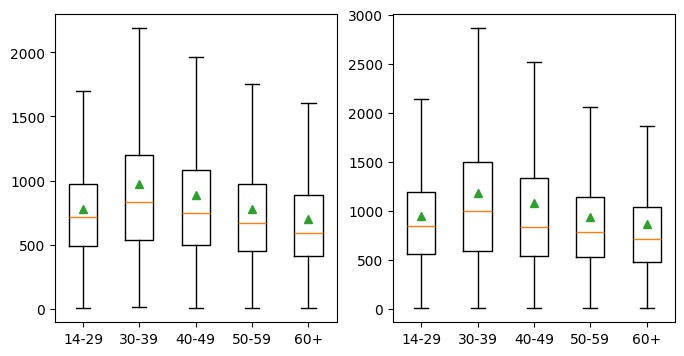

In [36]:
bduF = []
for i in atlyginimaiF:
    skaiciaiF = np.fromstring(i, sep=',')
    bduF.append(skaiciaiF)
bduM = []
for i in atlyginimaiM:
    skaiciaiM = np.fromstring(i, sep=',')
    bduM.append(skaiciaiM)
    
# boxplot:
fig, axis = plt.subplots(1, 2, figsize=(8, 4))

axis[0].boxplot(bduF, showmeans=True, showfliers=False)
axis[0].set_xticklabels(amziusF)
axis[1].boxplot(bduM, showmeans=True, showfliers=False)
axis[1].set_xticklabels(amziusM)

plt.show()

In [6]:
sql="""select issilavinimas, group_concat(bdu_spalio)
from DUS2018N
group by issilavinimas;"""
C.execute(sql)
ans = C.fetchall()
issilavinimas, atlyginimai = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |       G1       |555,686,436,455,|
| 1 |       G2       |460,1487,1500,15|
| 2 |       G3       |511,915,975,1087|
| 3 |       G4       |1061,1072,1400,2|


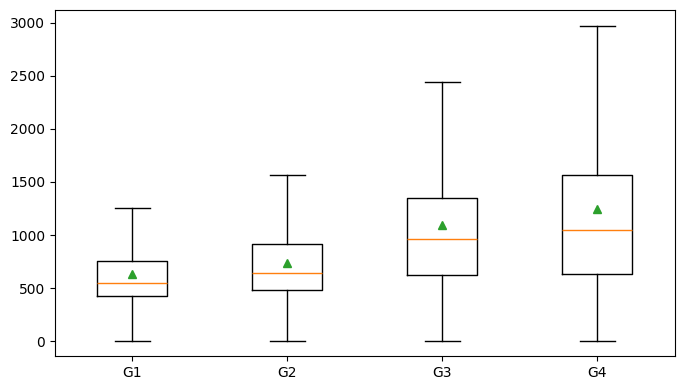

In [9]:
atl = []
for i in atlyginimai:
    skaiciai = np.fromstring(i, sep=',')
    atl.append(skaiciai)

# boxplot:
fig, axis = plt.subplots(figsize=[8,4.5])

axis.boxplot(atl, showmeans=True, showfliers=False)

axis.set_xticklabels(issilavinimas)

plt.show()

In [32]:
sql="""select gamintojas, group_concat(replace(price, ' ','')), count(*) as kiekis
from autopliuslt
group by gamintojas
order by kiekis desc
limit 5;"""
C.execute(sql)
ans = C.fetchall()
gamintojas, kainos, kiekis = list(map(list, zip(*ans)))
#? = np.transpose(ans)
sql="""select avg(replace(price, ' ','')) from autopliuslt;"""
C.execute(sql)
ansV = C.fetchall()
vidkaina = list(map(list, zip(*ansV)))

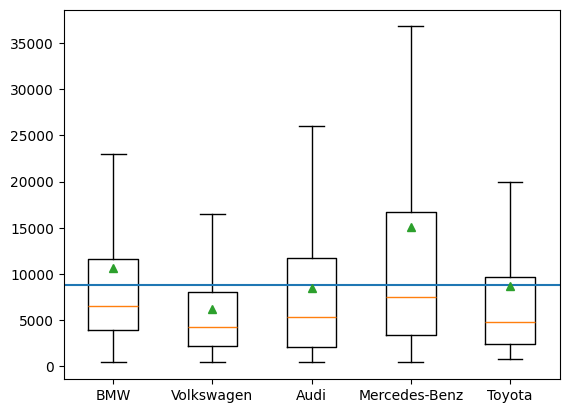

In [33]:
autokainos = []
for i in kainos:
    skaiciai = np.fromstring(i, sep=',')
    autokainos.append(skaiciai)

# boxplot:
fig, axis = plt.subplots()

axis.boxplot(autokainos, showmeans=True, showfliers=False)
axis.axhline(y=vidkaina)
axis.set_xticklabels(gamintojas)

plt.show()

In [48]:
sql="""select gamintojas, round(avg(replace(price, ' ','')),0), count(*) as kiekis
from autopliuslt
group by gamintojas
order by kiekis desc
limit 5;"""
C.execute(sql)
ans1 = C.fetchall()
gamintojas1, vidurkis1, kiekis1 = list(map(list, zip(*ans1)))
#? = np.transpose(ans)


sql="""select gamintojas, round(avg(price),0), count(*) as kiekis 
from
(select id, count(*) as kiekis, gamintojas, replace(price, ' ','') as price
from autopliuslt
group by id) as T1
group by gamintojas
order by kiekis desc
limit 5;"""
C.execute(sql)
ans2 = C.fetchall()
gamintojas2, vidurkis2,kiekis2 = list(map(list, zip(*ans2)))


[10652.0, 6191.0, 8448.0, 15080.0, 8713.0]


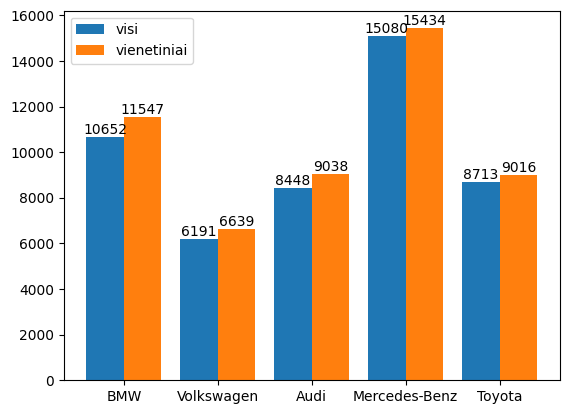

In [57]:
fig, axis = plt.subplots()

# a=axis.bar(gamintojas, vidurkis1)
# axis.bar_label(a)

# b=axis.bar(gamintojas, vidurkis1)
# axis.bar_label(b)

x = np.arange(0, len(gamintojas1))
w = 0.4
a=axis.bar(x-w/2, vidurkis1, label='visi', width=w)
b=axis.bar(x+w/2, vidurkis2, label='vienetiniai', width=w)
axis.set_xticks(x)
axis.set_xticklabels(gamintojas1)
axis.bar_label(a)
axis.bar_label(b)


axis.legend(loc='best')
plt.show()

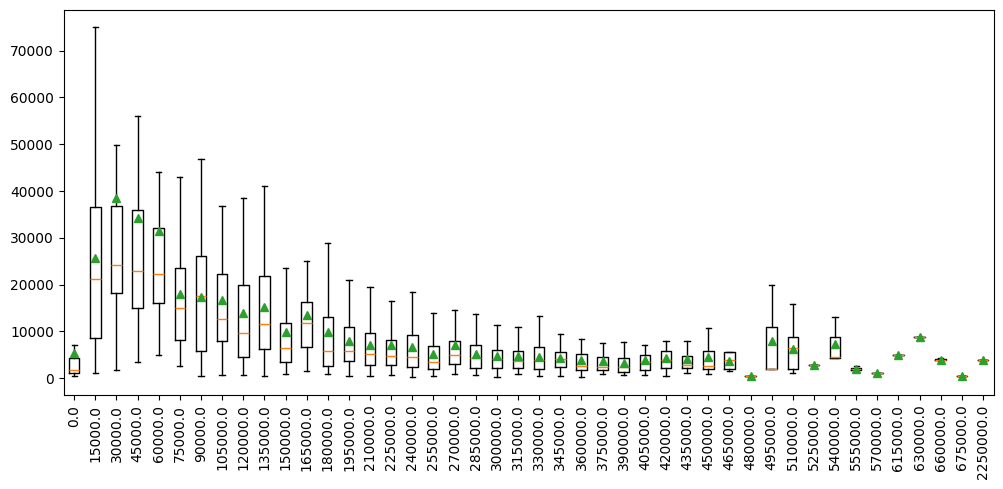

In [74]:
sql="""select
(ceil(cast(replace(replace(rida,' ',''),'km','') as float) / 15000) * 15000) as rida1,
group_concat((replace(price, ' ',''))) as kaina
from autopliuslt
group by rida1;"""
C.execute(sql)
ans = C.fetchall()
rida, kaina = list(map(list, zip(*ans)))
#? = np.transpose(ans)

autokainos = []
for i in kaina:
    skaiciai = np.fromstring(i, sep=',')
    autokainos.append(skaiciai)
    
# boxplot:
fig, axis = plt.subplots(figsize=[12,5])
axis.boxplot(autokainos, showmeans=True, showfliers=False)
axis.set_xticklabels(rida)
axis.tick_params(axis='x', rotation=90)
plt.show()


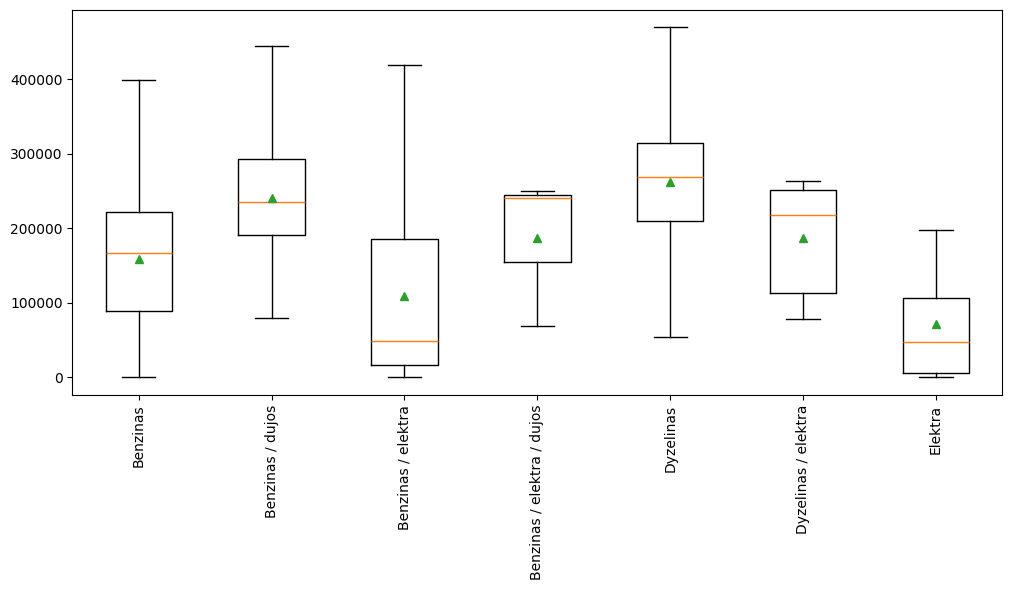

In [75]:
sql="""select kuro_tipas, group_concat(cast(replace(replace(rida,' ',''),'km','') as float)) as rida
from autopliuslt
group by kuro_tipas;"""
C.execute(sql)
ans = C.fetchall()
kuras, rida = list(map(list, zip(*ans)))
#? = np.transpose(ans)

ridos = []
for i in rida:
    skaiciai = np.fromstring(i, sep=',')
    ridos.append(skaiciai)
    
# boxplot:
fig, axis = plt.subplots(figsize=[12,5])
axis.boxplot(ridos, showmeans=True, showfliers=False)
axis.set_xticklabels(kuras)
axis.tick_params(axis='x', rotation=90)
plt.show()

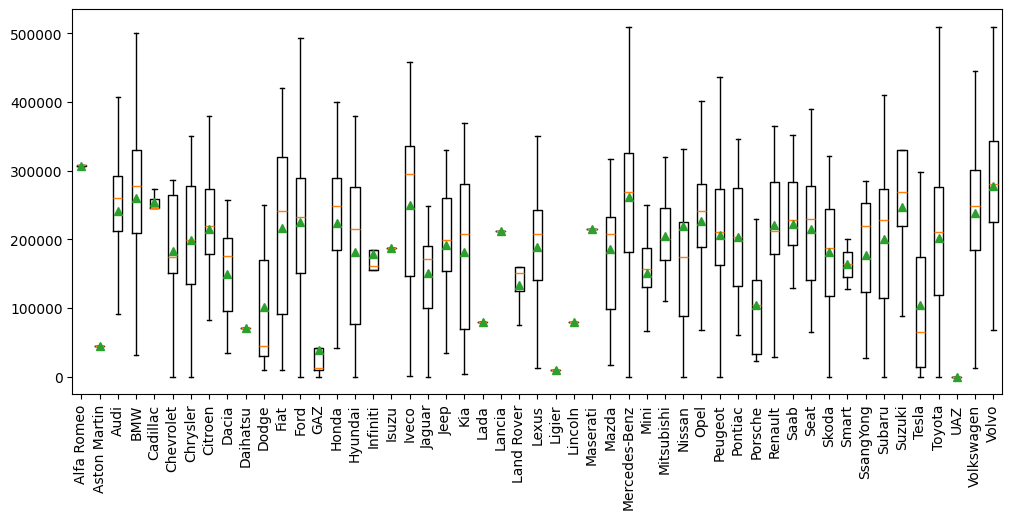

In [76]:
sql="""select gamintojas, group_concat(cast(replace(replace(rida,' ',''),'km','') as float)) as rida
from autopliuslt
group by gamintojas;"""
C.execute(sql)
ans = C.fetchall()
gamintojas, rida = list(map(list, zip(*ans)))
#? = np.transpose(ans)

ridos = []
for i in rida:
    skaiciai = np.fromstring(i, sep=',')
    ridos.append(skaiciai)
    
# boxplot:
fig, axis = plt.subplots(figsize=[12,5])
axis.boxplot(ridos, showmeans=True, showfliers=False)
axis.set_xticklabels(gamintojas)
axis.tick_params(axis='x', rotation=90)
plt.show()

In [ ]:
# pagal jūsų surinktas ir pastebėtas priklausomybes, jei matote:
# M-Benz, 12 metų, benzinas, 210 000 km -
# kokia kaina būtų konkurencinga/logiška/tikėtina? Kodėl?



In [ ]:
# suraskite visus gamintojus, kurių  modelių vidutinė kaina yra didesnė už vidutinę
# visų automobilių
# kainą.
# Iš jų atrinkite 5-kis brangiausius gamintojus, ir suraskite jų 
# parduodamų modelių vidutinį amžių.
# taip pat atvaizduokite su boxplot'ais šių 5-kių gamintojų parduodamų modelių kainų pasiskirstymą.



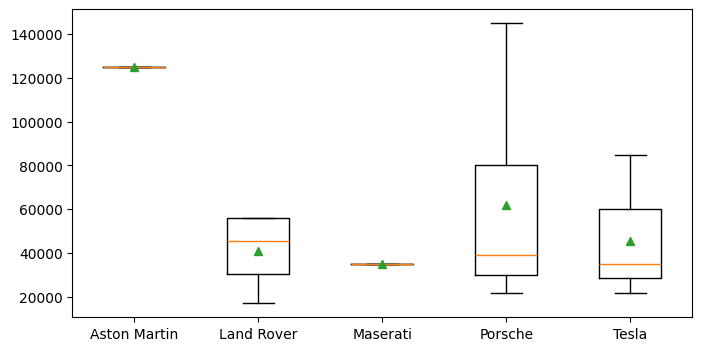

In [78]:
sql="""select gamintojas, kainagr
from
(select gamintojas, kaina, vidkaina
from
(select gamintojas, avg(replace(price, ' ','')) as kaina
from autopliuslt
group by gamintojas) as T1
cross join
(select avg(replace(price, ' ','')) as vidkaina
from autopliuslt) as T2
where kaina>vidkaina
order by kaina desc
limit 5) as T11
left join
(select gamintojas, group_concat((replace(price, ' ',''))) as kainagr
from autopliuslt
group by gamintojas) as T22
using (gamintojas);"""
C.execute(sql)
ans = C.fetchall()
gamintojas, kainos = list(map(list, zip(*ans)))
#? = np.transpose(ans)

kaina = []
for i in kainos:
    skaiciai = np.fromstring(i, sep=',')
    kaina.append(skaiciai)
    
# boxplot:
fig, axis = plt.subplots(figsize=[8,4])
axis.boxplot(kaina, showmeans=True, showfliers=False)
axis.set_xticklabels(gamintojas)
plt.show()